In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [30]:
# df.to_csv('file.csv', index=False)


In [31]:
df = pd.read_csv('file.csv')

In [32]:
df

,Gender,Age,Weight(kg),Height(cm),BMI,Income($),Social Isolation Score
0,M,24,64.5,170.2,22.265918,38000,3
1,F,57,79.1,167.5,28.193362,75000,2
2,M,42,78.8,178.1,24.842676,45000,6
3,F,38,72.9,164.8,26.841891,53000,4
4,F,31,67.2,171.9,22.741417,32000,7
...,...,...,...,...,...,...,...
1004,Male,45,81.0,179.0,25.280110,50000,5
1005,Female,34,63.0,170.0,21.799308,35000,4
1006,Male,54,89.0,182.0,26.868736,70000,6
1007,Female,39,68.0,165.0,24.977043,45000,4


In [33]:
df["Gender"] = df["Gender"].replace({"Female": "F", "Male": "M"})

In [34]:
df

,Gender,Age,Weight(kg),Height(cm),BMI,Income($),Social Isolation Score
0,M,24,64.5,170.2,22.265918,38000,3
1,F,57,79.1,167.5,28.193362,75000,2
2,M,42,78.8,178.1,24.842676,45000,6
3,F,38,72.9,164.8,26.841891,53000,4
4,F,31,67.2,171.9,22.741417,32000,7
...,...,...,...,...,...,...,...
1004,M,45,81.0,179.0,25.280110,50000,5
1005,F,34,63.0,170.0,21.799308,35000,4
1006,M,54,89.0,182.0,26.868736,70000,6
1007,F,39,68.0,165.0,24.977043,45000,4


In [35]:
df['Income($)'] = df['Income($)'].str.replace(',', '').astype(float)


# Target Column

In [36]:
df['Index'] = range(len(df))

In [37]:
df

,Gender,Age,Weight(kg),Height(cm),BMI,Income($),Social Isolation Score,Index
0,M,24,64.5,170.2,22.265918,38000.0,3,0
1,F,57,79.1,167.5,28.193362,75000.0,2,1
2,M,42,78.8,178.1,24.842676,45000.0,6,2
3,F,38,72.9,164.8,26.841891,53000.0,4,3
4,F,31,67.2,171.9,22.741417,32000.0,7,4
...,...,...,...,...,...,...,...,...
1004,M,45,81.0,179.0,25.280110,50000.0,5,1004
1005,F,34,63.0,170.0,21.799308,35000.0,4,1005
1006,M,54,89.0,182.0,26.868736,70000.0,6,1006
1007,F,39,68.0,165.0,24.977043,45000.0,4,1007


### X & Y 

In [38]:
# separate features and target variable
X = df[['Gender','Age','Weight(kg)','Height(cm)','BMI','Income($)','Social Isolation Score']]
y = df.iloc[:, -1]

### Model


Enter your Gender :M
Enter your Age :56
Enter your Weight :87
Enter your Height :172
Enter your Income :40000
Enter your Social Isolation Score :3
How the new User is common 666


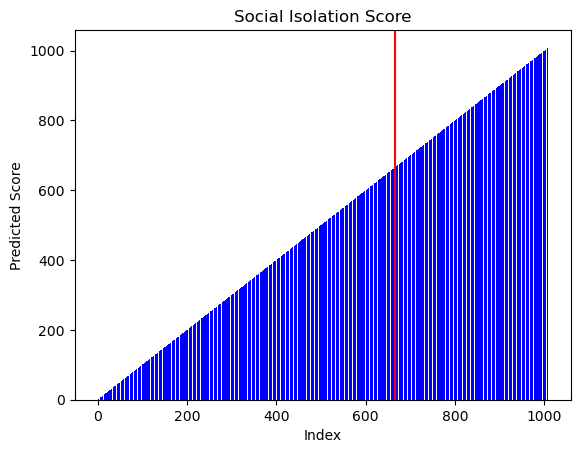


Overall Score: 340/1000
Health Score : 896
Income Score : 381
Social Isolation Score : 300
625 people are above you, and 384 people are below you based on income.
How much people are above then you : 34 % Above Then you


In [40]:
### import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# apply label encoding to categorical data
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# apply feature scaling to the data
scaler = StandardScaler()
X[['Gender','Age', 'Weight(kg)', 'Height(cm)','BMI', 'Income($)', 'Social Isolation Score']] = scaler.fit_transform(X[['Gender','Age', 'Weight(kg)', 'Height(cm)','BMI', 'Income($)', 'Social Isolation Score']])

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model
model = LogisticRegression(C=10)
model.fit(X_train, y_train)

# predict on test set and print classification report
y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

# example input for a male, 45 years old, 60 kg, 170 cm tall, BMI=23, income=50k, social isolation score=3, located in the US
gen = input('Enter your Gender :')
if gen == 'M':
    gen = 0
elif gen == 'F':
    gen = 1
else:
    print('give proper input')
ag = input('Enter your Age :')
we = input('Enter your Weight :')
he = input('Enter your Height :')
he_m = int(he) / 100 
BMI = int(we)  / (he_m)**2
inc = input('Enter your Income :')
while int(inc) <= 15000:
    print('Please enter an income greater than 15000')
    inc = input('Enter your Income :')

sis = input('Enter your Social Isolation Score :')
new_user = [[gen,ag,we,he,BMI,inc,sis]] 
new_user_df = pd.DataFrame(new_user, columns=['Gender', 'Age', 'Weight(kg)', 'Height(cm)','BMI',  'Income($)', 'Social Isolation Score'])

# new_user_df['Gender'] = le.transform(new_user_df['Gender'])

new_user_df[['Gender','Age', 'Weight(kg)', 'Height(cm)','BMI',  'Income($)', 'Social Isolation Score']] = scaler.transform(new_user_df[['Gender','Age', 'Weight(kg)', 'Height(cm)','BMI',  'Income($)', 'Social Isolation Score']])

# predict social isolation score for new user
index_prediction = model.predict(new_user_df)

print("How the new User is common", index_prediction[0])


# ------------------------------------------------------------------

# create a bar chart showing the predicted class for the new user
plt.bar(df.index,y, color='b')
# plt.bar([len(df)], [index_prediction[0]], color='r')

# set plot properties
plt.title('Social Isolation Score')
plt.xlabel('Index')
plt.ylabel('Predicted Score')
# plt.xticks(np.append(df.index, len(df)))

# add a vertical red line at the position of the new user index
plt.axvline(x=[index_prediction[0]], color='r')

plt.show()

# -------------------------------------------------------------
# calculate individual scores
health_score = round((BMI / df['BMI'].max()) * 1000)
income_score = round((int(inc) / df['Income($)'].max()) * 1000)
social_isolation_score = round((int(sis) / df['Social Isolation Score'].max()) * 1000)

# calculate overall score and percentage
overall_score = round((1 - ([index_prediction[0]][0] / len(df))) * 1000)
percentage = round(([index_prediction[0]][0] ) / len(df) * 100)

# calculate number of people above and below
people_above = round((1 - income_score/1000) * len(df))
people_below = len(df) - people_above

# print scores and number of people above and below
print(f"\nOverall Score: {overall_score}/1000")
print('Health Score :', health_score)
print('Income Score :', income_score)
print('Social Isolation Score :', social_isolation_score)
print(f"{people_above} people are above you, and {people_below} people are below you based on income.")


# -------------------------------------------------------------

percentage = ([index_prediction[0]][0] ) / len(df) * 100
common_men = round(100-percentage)
# ------------------------------------------------------------



print('How much people are above then you :',common_men,'% Above Then you')
